In [1]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('/home/cacaprog/learning-projects/honey-production/honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
# Let's check tha data
df.describe(include='all')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


In [6]:
# task 2
# Calculate the mean of total production per year
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()

prod_per_year.head(10)

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [12]:
# Task 3
X = prod_per_year.year

# Reshape
X = X.values.reshape(-1,1)

In [13]:
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [14]:
# Task 4
y = prod_per_year.totalprod

In [15]:
y.head()

0    5.105093e+06
1    4.706674e+06
2    5.106000e+06
3    4.221545e+06
4    3.892386e+06
Name: totalprod, dtype: float64

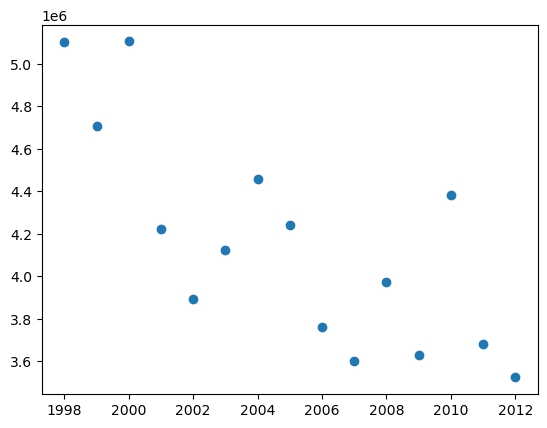

In [52]:
# Task 5
plt.scatter(X,y)
plt.show()

In [25]:
# Task 6
# Create a linear regression
regr = linear_model.LinearRegression()

# Task 7
regr.fit(X,y)

# Task 8 print the slope
print(regr.coef_[0])
# print the intercept
print(regr.intercept_)

-88303.18915238195
181208083.10732982


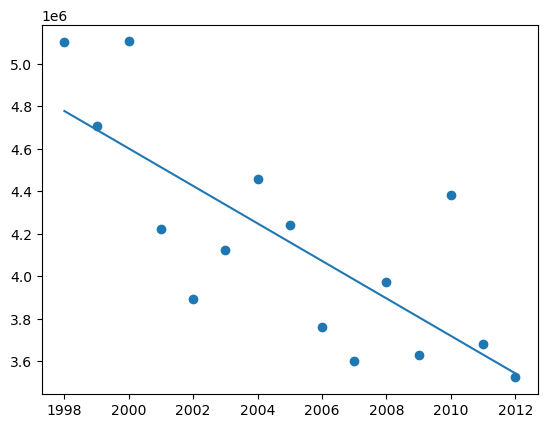

In [54]:
# Task 9
y_predicted = regr.predict(X)

# Task 10
plt.clf()
plt.scatter(X, y)
plt.plot(X, y_predicted)
plt.show()

In [37]:
# Let´s predict what the year 2050 may look like in terms of honey production
# Task 11
X_future = np.array(range(2013, 2051))


In [38]:
X_future

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
       2046, 2047, 2048, 2049, 2050])

In [39]:
# Reshape
X_future = X_future.reshape(-1,1)

In [40]:
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050]])

In [43]:
future_predict = regr.predict(X_future)

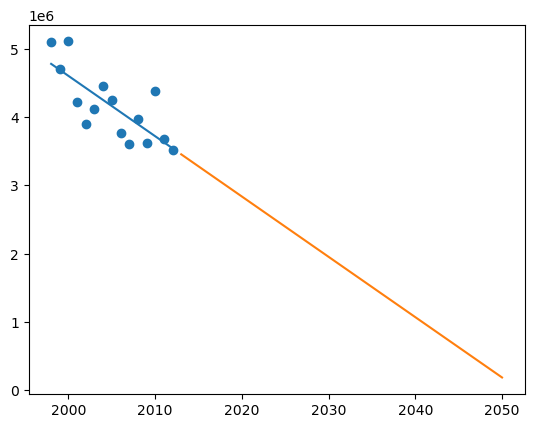

In [57]:
# Plot future_predict vs X_future on a different plot
plt.clf()
plt.scatter(X, y)
plt.plot(X, y_predicted)
plt.plot(X_future, future_predict)
plt.show()